# K-Nearest Neighbors

## Objectives


*   Use K Nearest neighbors to classify data


<h2 id="importing_libraries">Importing required libraries</h2>


In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder


import seaborn as sns
%matplotlib inline

<div id="about_dataset">
    <h2>About the dataset</h2>
</div>


Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. 

It is a classification problem. That is, given the dataset, with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns.

The target field, called **custcat**, has four possible values that correspond to the four customer groups, as follows:

1- Basic Service
2- E-Service
3- Plus Service
4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases.


In [113]:
df = pd.read_csv("https://raw.githubusercontent.com/Aylin1/Data-Science-Portfolio/6c21aa8f668e0f53754f6cda8af33c772c146479/teleCust1000t.csv")

df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [115]:
df.nunique()

region       3
tenure      72
age         60
marital      2
address     50
income     218
ed           5
employ      46
retire       2
gender       2
reside       8
custcat      4
dtype: int64

In [116]:
df.retire = df.retire.astype("int")

<div id="visualization_analysis">
    <h2>Data Visualization and Analysis</h2> 
</div>


array([[<AxesSubplot:title={'center':'region'}>,
        <AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'marital'}>,
        <AxesSubplot:title={'center':'address'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'ed'}>,
        <AxesSubplot:title={'center':'employ'}>,
        <AxesSubplot:title={'center':'retire'}>],
       [<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'reside'}>,
        <AxesSubplot:title={'center':'custcat'}>]], dtype=object)

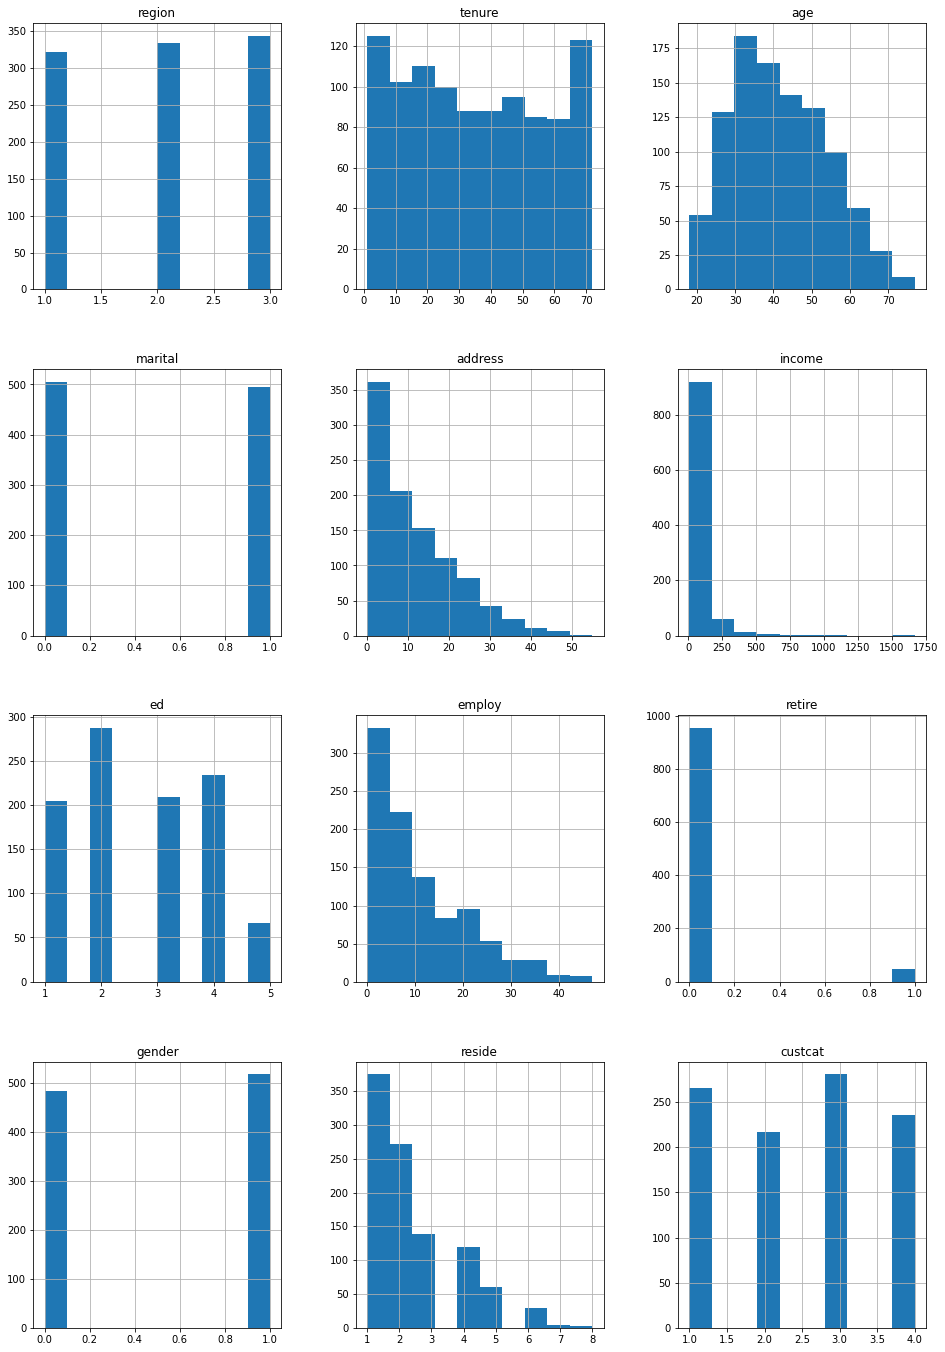

In [117]:
df.hist(figsize=(16,24))

### Feature set


In [182]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:


In [194]:
X = df.drop(["region","address","reside","custcat"],axis=1)
X[0:5]

,tenure,age,marital,income,ed,employ,retire,gender
0,13,44,1,64.0,4,5,0,0
1,11,33,1,136.0,5,5,0,0
2,68,52,1,116.0,1,29,0,1
3,33,33,0,33.0,2,0,0,1
4,23,30,1,30.0,1,2,0,0


What are our labels?


In [184]:
y = df['custcat']
y[0:5]

0    1
1    4
2    3
3    1
4    3
Name: custcat, dtype: int64

## ***Creating train and test dataset***

In [185]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4, stratify=y)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 8) (800,)
Test set: (200, 8) (200,)


## Data Standardization


Data Standardization gives the data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on the distance of data points:


In [186]:
#feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

<div id="classification">
    <h2>Classification</h2>
</div>


### Training

Let's start the algorithm with k=4 for now:


In [187]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

### Predicting

We can use the model to make predictions on the test set:


In [188]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([2, 1, 2, 4, 2])

### Accuracy evaluation

In multilabel classification, **accuracy classification score** is a function that computes subset accuracy. This function is equal to the jaccard_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.


In [189]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.56125
Test set Accuracy:  0.345


#### What about other K?

In [190]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n, metric="euclidean").fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat) #accuracy_score -> In binary and multiclass classification, this function is equal to the jaccard_score function.
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.33 , 0.3  , 0.365, 0.345, 0.39 , 0.375, 0.37 , 0.41 , 0.38 ])

#### Plot the model accuracy for a different number of neighbors.


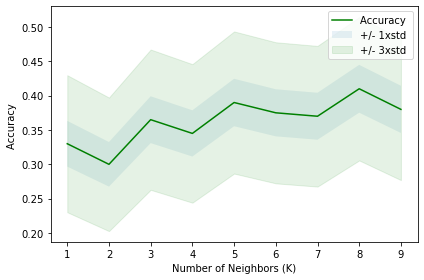

In [191]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [192]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.41 with k= 8
